<a href="https://colab.research.google.com/github/DostdarDost/Deep-Learning-Algorithms/blob/main/Deep_Learning_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning from Scratch - Chapter 1 Lab Notebook
This notebook contains the code implementations and experiments from Chapter 1 of "Deep Learning from Scratch" by Seth Weidman. We'll explore the foundational concepts of functions, derivatives, nested functions, and the chain rule through Python implementations.


## Setup
First, let's import the necessary libraries:

In [1]:
import numpy as np
from typing import Callable, List, Dict, Tuple
from numpy import ndarray
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Basic Functions
Mathematical Functions Implementation

$ f_1(x) = x^2$    

$ f_2(x) = max(0,1)$

$ f_3(x) = \frac{1}{1+e^{-x}} $

In [2]:
def square(x: ndarray) -> ndarray:
    """
    Square each element in the input ndarray.
    """
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    """
    Apply "Leaky ReLU" function to each element in ndarray.
    """
    return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
    """
    Apply the sigmoid function to each element in the input ndarray.
    """
    return 1 / (1 + np.exp(-x))

## Function Plotting

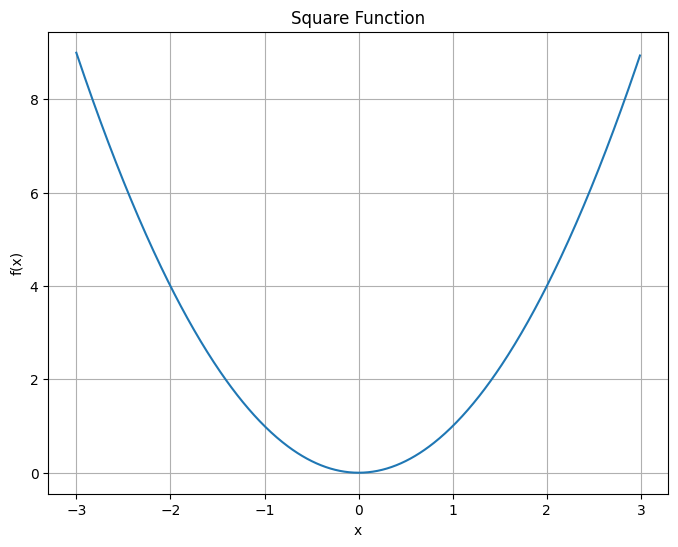

In [4]:
def plot_function(func: Callable[[ndarray], ndarray],
                 x_axis: ndarray,
                 title: str = None) -> None:
    """
    Plot a function over a range of values.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(x_axis, func(x_axis))
    if title:
        plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

# Plot range
PLOT_RANGE = np.arange(-3, 3, 0.01)

# Plot our functions
plot_function(square, PLOT_RANGE, "Square Function")


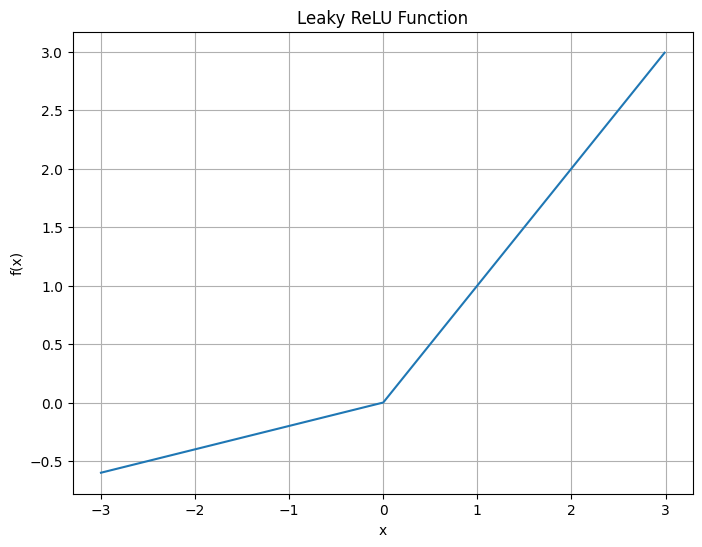

In [5]:
plot_function(leaky_relu, PLOT_RANGE, "Leaky ReLU Function")


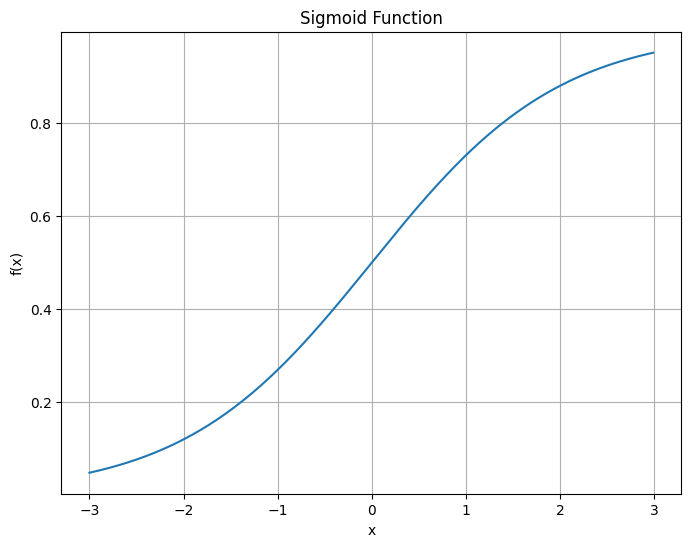

In [6]:
plot_function(sigmoid, PLOT_RANGE, "Sigmoid Function")

## 2. Derivatives
Derivative Calculation

$ \frac {df}{du}(a) = lim_{\Delta  \rightarrow 0}\frac{f(a +Δ)-f(a -Δ)}{2×Δ} $


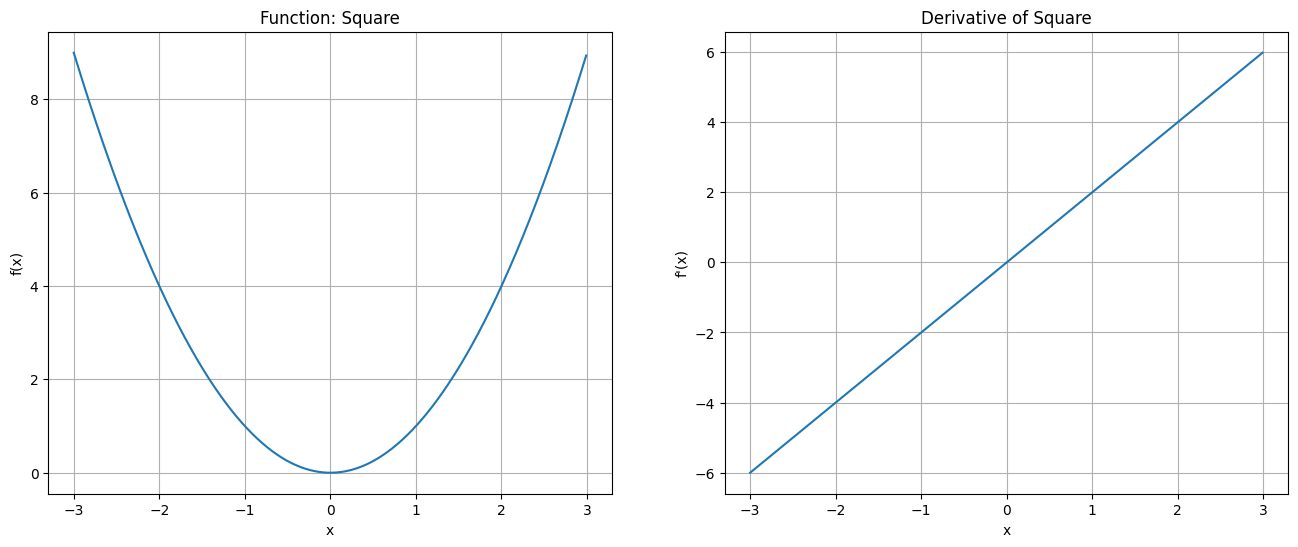

In [7]:
def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          delta: float = 0.001) -> ndarray:
    """
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    """
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

# Plot derivatives
def plot_function_and_derivative(func: Callable[[ndarray], ndarray],
                               x_axis: ndarray,
                               title: str = None) -> None:
    """
    Plot a function and its derivative side by side.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot function
    ax1.plot(x_axis, func(x_axis))
    ax1.set_title(f"Function: {title}")
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.grid(True)

    # Plot derivative
    ax2.plot(x_axis, deriv(func, x_axis))
    ax2.set_title(f"Derivative of {title}")
    ax2.set_xlabel('x')
    ax2.set_ylabel("f'(x)")
    ax2.grid(True)

    plt.show()

# Plot functions and their derivatives
plot_function_and_derivative(square, PLOT_RANGE, "Square")


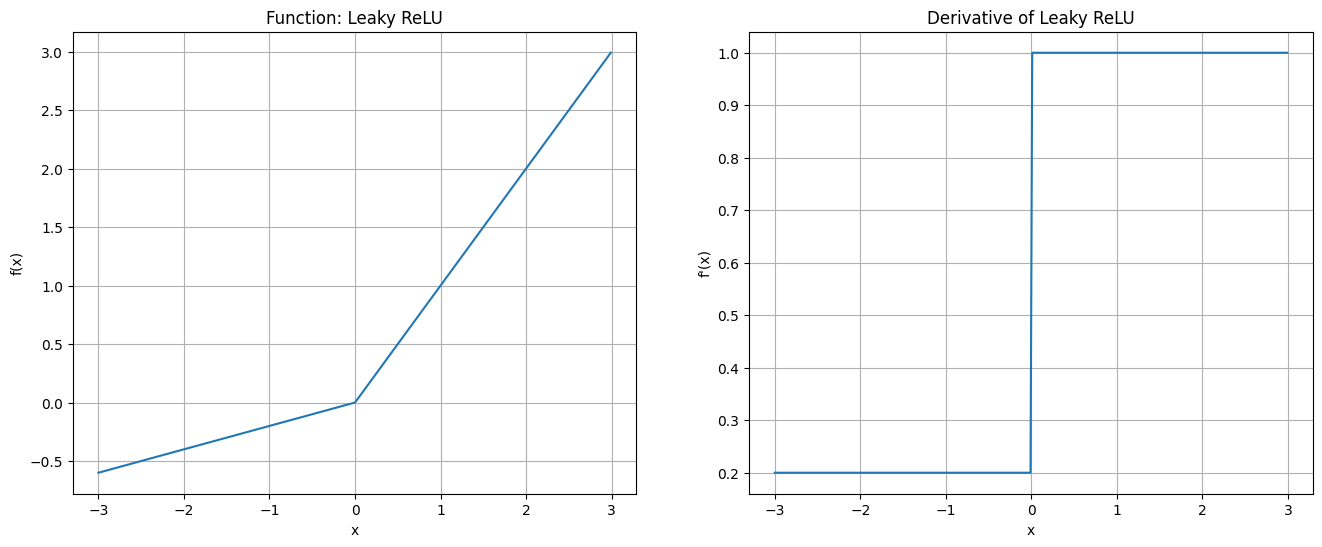

In [8]:
plot_function_and_derivative(leaky_relu, PLOT_RANGE, "Leaky ReLU")


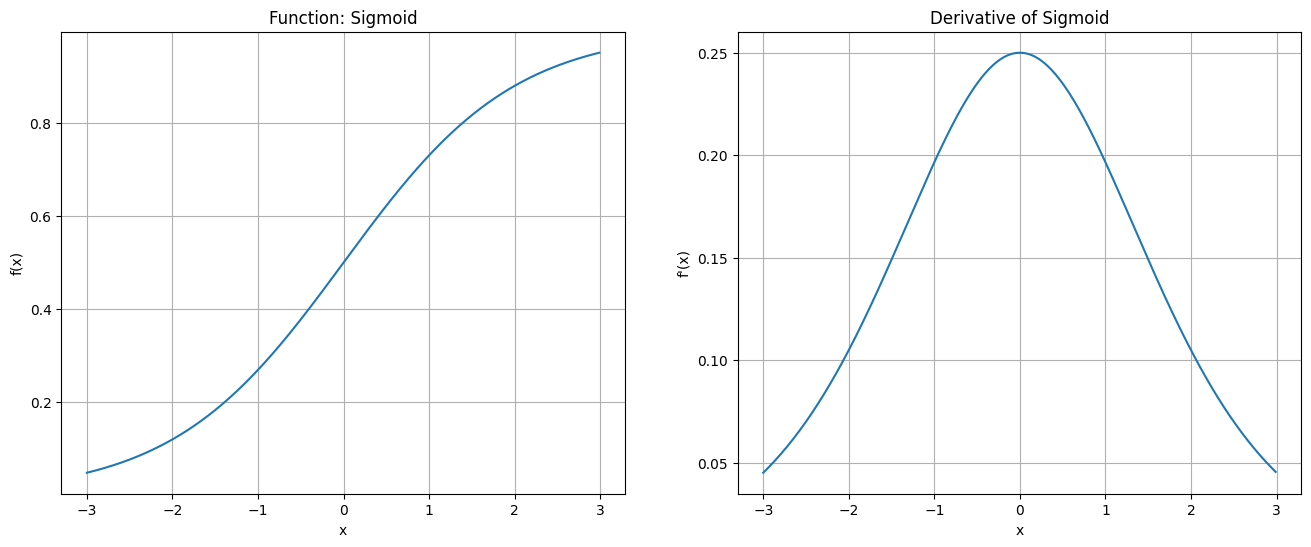

In [9]:
plot_function_and_derivative(sigmoid, PLOT_RANGE, "Sigmoid")

## 3. Nested Functions and Chain Rule
Chain Implementation

In [10]:
Array_Function = Callable[[ndarray], ndarray]
Chain = List[Array_Function]

def chain_length_2(chain: Chain,
                  x: ndarray) -> ndarray:
    """
    Evaluates two functions in a row, in a "Chain".
    """
    assert len(chain) == 2, \
        "Length of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

def chain_deriv_2(chain: Chain,
                 input_range: ndarray) -> ndarray:
    """
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x)))' = f2'(f1(x)) * f1'(x)
    """
    assert len(chain) == 2, \
        "This function requires 'Chain' objects of length 2"
    assert input_range.ndim == 1, \
        "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du

### Chain Rule Verification

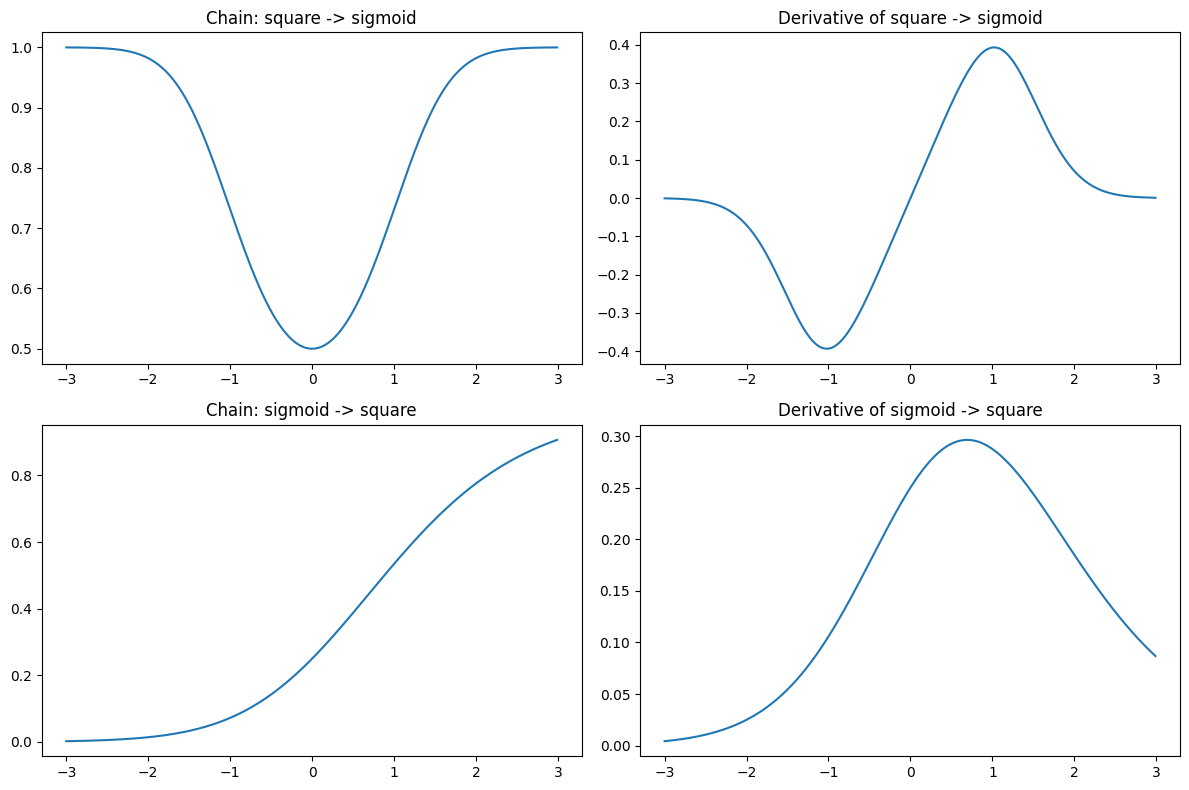

In [11]:
def plot_chain(chain: Chain,
              input_range: ndarray) -> None:
    """
    Plots a chain function - a function that consists of multiple
    consecutive ndarray -> ndarray mappings.
    """
    assert input_range.ndim == 1, \
        "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    plt.plot(input_range, output_range)

def plot_chain_deriv(chain: Chain,
                    input_range: ndarray) -> None:
    """
    Uses the chain rule to plot the derivative of a nested function.
    """
    output_range = chain_deriv_2(chain, input_range)
    plt.plot(input_range, output_range)

# Test chains
chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

# Plot chains and their derivatives
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plot_chain(chain_1, PLOT_RANGE)
plt.title("Chain: square -> sigmoid")

plt.subplot(2, 2, 2)
plot_chain_deriv(chain_1, PLOT_RANGE)
plt.title("Derivative of square -> sigmoid")

plt.subplot(2, 2, 3)
plot_chain(chain_2, PLOT_RANGE)
plt.title("Chain: sigmoid -> square")

plt.subplot(2, 2, 4)
plot_chain_deriv(chain_2, PLOT_RANGE)
plt.title("Derivative of sigmoid -> square")

plt.tight_layout()
plt.show()

## 4. Functions with Multiple Inputs
Multiple Input Functions

In [12]:
def multiple_inputs_add(x: ndarray,
                      y: ndarray,
                      sigma: Array_Function) -> float:
    """
    Function with multiple inputs and addition, forward pass.
    """
    assert x.shape == y.shape
    a = x + y
    return sigma(a)

def multiple_inputs_add_backward(x: ndarray,
                               y: ndarray,
                               sigma: Array_Function) -> Tuple[float, float]:
    """
    Computes the derivative of this simple function with respect to both inputs.
    """
    # Compute "forward pass"
    a = x + y

    # Compute derivatives
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady

# Test multiple inputs
x = np.array([1.0, 2.0, 3.0])
y = np.array([4.0, 5.0, 6.0])

print("Forward pass:", multiple_inputs_add(x, y, sigmoid))
dx, dy = multiple_inputs_add_backward(x, y, sigmoid)
print("Derivative w.r.t. x:", dx)
print("Derivative w.r.t. y:", dy)

Forward pass: [0.99330715 0.99908895 0.99987661]
Derivative w.r.t. x: [0.00664806 0.00091022 0.00012338]
Derivative w.r.t. y: [0.00664806 0.00091022 0.00012338]


## 5. Matrix Operations
Matrix Multiplication Forward Pass

In [13]:
def matmul_forward(X: ndarray,
                  W: ndarray) -> ndarray:
    """
    Computes the forward pass of a matrix multiplication.
    """
    assert X.shape[1] == W.shape[0], \
        f"""For matrix multiplication, the number of columns in the first array should
        match the number of rows in the second; instead the number of columns in the
        first array is {X.shape[1]} and the number of rows in the second array is {W.shape[0]}"""

    # matrix multiplication
    N = np.dot(X, W)
    return N

# Test matrix multiplication
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X shape:", X.shape)
print("W shape:", W.shape)
print("Output shape:", matmul_forward(X, W).shape)

X shape: (3, 3)
W shape: (3, 2)
Output shape: (3, 2)


### Matrix Multiplication Backward Pass

In [14]:
def matrix_function_forward_sum(X: ndarray,
                              W: ndarray,
                              sigma: Array_Function) -> float:
    """
    Computing the result of the forward pass of this function with input ndarrays X and W and function sigma.
    """
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

def matrix_function_backward_sum_1(X: ndarray,
                                 W: ndarray,
                                 sigma: Array_Function) -> ndarray:
    """
    Compute derivative of matrix function with a sum with respect to the first matrix input.
    """
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    # backward calculation
    dLdS = np.ones_like(S)
    dSdN = deriv(sigma, N)
    dLdN = dLdS * dSdN

    dNdX = np.transpose(W, (1, 0))

    # dLdX
    dLdX = np.dot(dSdN, dNdX)

    return dLdX

# Test matrix backward pass
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X:")
print(X)
print("\nW:")
print(W)

print("\nForward pass output:", matrix_function_forward_sum(X, W, sigmoid))
print("\nGradient w.r.t. X:")
print(matrix_function_backward_sum_1(X, W, sigmoid))

X:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]

W:
[[ 0.75510818  0.25562492]
 [-0.56109271 -0.97504841]
 [ 0.98098478 -0.95870776]]

Forward pass output: 2.3754951014116954

Gradient w.r.t. X:
[[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


## Gradient Checking
Let's verify our gradient calculation is correct by perturbing one element of X and observing the change in output:

In [15]:
# Original X
X = np.array([[-1.5775, -0.6664,  0.6391],
              [-0.5615,  0.7373, -1.4231],
              [-1.4435, -0.3913,  0.1539]])

# Perturb X[0,0] by 0.001
X1 = X.copy()
X1[0, 0] += 0.001

# Calculate numerical gradient
original_output = matrix_function_forward_sum(X, W, sigmoid)
perturbed_output = matrix_function_forward_sum(X1, W, sigmoid)
numerical_gradient = (perturbed_output - original_output) / 0.001

# Our computed gradient
computed_gradient = matrix_function_backward_sum_1(X, W, sigmoid)[0, 0]

print("Numerical gradient:", numerical_gradient)
print("Computed gradient:", computed_gradient)
print("Difference:", abs(numerical_gradient - computed_gradient))

Numerical gradient: 0.2488967959441979
Computed gradient: 0.24888865331085594
Difference: 8.142633341950978e-06


## Visualizing the Gradient

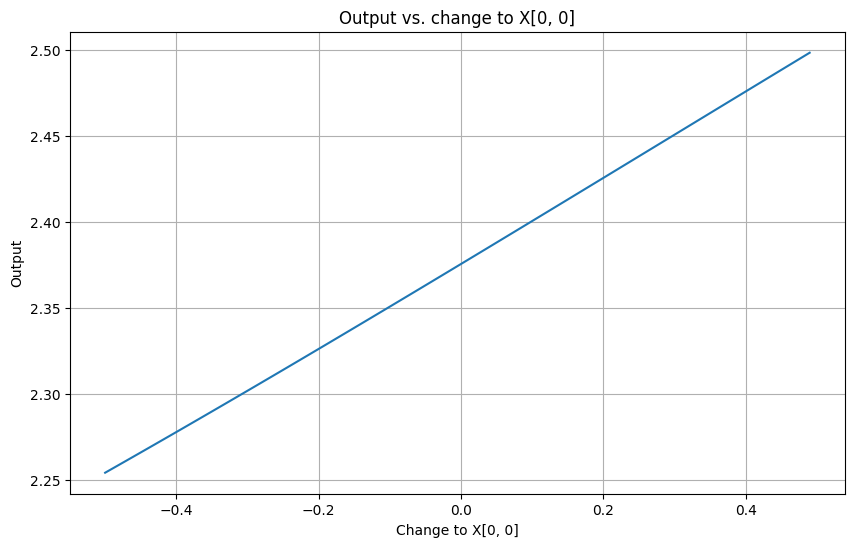

In [16]:
def visualize_gradient(X: ndarray,
                     W: ndarray,
                     sigma: Array_Function,
                     element_idx: Tuple[int, int],
                     delta_range: ndarray = np.arange(-0.5, 0.5, 0.01)) -> None:
    """
    Visualize how changing one element of X affects the output.
    """
    outputs = []
    i, j = element_idx

    for delta in delta_range:
        X_perturbed = X.copy()
        X_perturbed[i, j] += delta
        outputs.append(matrix_function_forward_sum(X_perturbed, W, sigma))

    plt.figure(figsize=(10, 6))
    plt.plot(delta_range, outputs)
    plt.xlabel(f'Change to X[{i}, {j}]')
    plt.ylabel('Output')
    plt.title(f'Output vs. change to X[{i}, {j}]')
    plt.grid(True)
    plt.show()

# Visualize gradient for X[0,0]
visualize_gradient(X, W, sigmoid, (0, 0))